# Module 5- Case study 2

focus – Insights from data


Business challenge/requirement:
    
SFO Public Department - referred to as SFO has captured all the salary data of its employees from year 2011-2014. Now we are in year 2015 and the organization is facing some financial crisis. As first step HR wants to rationalize employee cost to save payroll budget. You have to do data manipulation and analysis on the salary data to answer specific questions for cost savings.


Key issues:

Cost can be saved by figuring out the key pockets of high salaries

Approach to Solve:

You have to use fundamentals of Pandas covered in module 6 and answer following 5 Questions

1. Compute how much total salary cost has increased from year 2011 to 2014

2. Which Job Title in Year 2014 has highest mean salary?

3. How much money could have been saved in Year 2014 by stopping OverTimePay?

4. Which are the top 5 common job in Year 2014 and how much do they cost SFO ?

5. Who was the top earning employee across all the years?

Enhancements for code:

You can try these enhancements in code

1. Which are the last 5 common job in Year 2014 and how much do they cost SFO?

2. In year 201 OverTimePay was what percentage of TotalPayBenefits

3. Which Job Title in Year 2014 has lowest mean salary?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv(r'D:\E\Courses\Edureka\Assignments\Dataset\module5\Salaries.csv', low_memory=False)

In [5]:
print(df.shape)
df.head(3)

(148648, 13)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


1. Compute how much total salary cost has increased from year 2011 to 2014

In [9]:
df.groupby(['Year']).agg({'TotalPay':np.sum})

,TotalPay
Year,
2011,2.594113e+09
2012,2.724736e+09
2013,2.918656e+09
2014,2.876911e+09


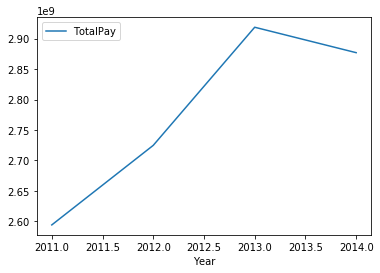

In [8]:
df.groupby(['Year']).agg({'TotalPay':np.sum}).plot()

From 2011 to 2014, salary expense increased from 2.59 Billion to 2.87 Billion

2. Which Job Title in Year 2014 has highest mean salary?

In [36]:
df[df['Year'] == 2014].groupby(['JobTitle']).agg({'TotalPay':np.mean}).sort_values(['TotalPay'], ascending=False)

,TotalPay
JobTitle,
Chief Investment Officer,339653.700000
Chief of Police,326716.760000
"Chief, Fire Department",326233.440000
"Gen Mgr, Public Trnsp Dept",294000.180000
Dep Chf of Dept (Fire Dept),285575.785000
...,...
"BdComm Mbr, Grp5,M$100/Mo",1300.115926
Special Examiner,1141.172414
"BdComm Mbr, Grp3,M=$50/Mtg",691.904762


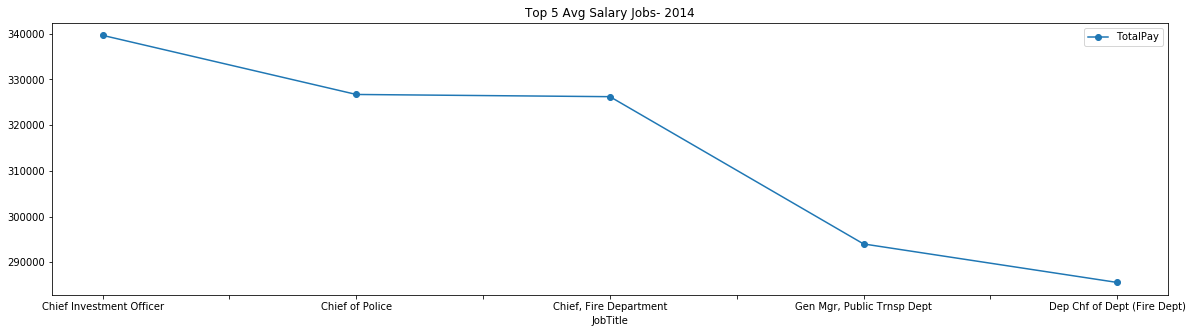

In [38]:
df[df['Year'] == 2014].groupby(['JobTitle']).agg({'TotalPay':np.mean}).sort_values(['TotalPay'], ascending=False).iloc[:5,:].plot(figsize=(20,5), marker='o')
plt.title('Top 5 Avg Salary Jobs- 2014')
plt.show()

Top 5 salaried JobTitles in 2024 are Chief Investment Officer, Chief of Police, Chief-Fire Department, Gen Mgr- Public Trnsp Dept, Dep Chf of Dept (Fire Dept) . This is based on top average salary.

3. How much money could have been saved in Year 2014 by stopping OverTimePay?

In [28]:
ot_2014 = df[df['Year'] == 2014]['OvertimePay'].sum()
ot_2014

205918599.26999998

In [33]:
tp_2014 = df[df['Year'] == 2014]['TotalPay'].sum()

ot_percentage = round(ot_2014/tp_2014*100,2)

tp_2014, ot_percentage

(2876910951.2599998, 7.16)

In [34]:
print(f"Overall overtime pay for 2014 : {ot_2014}")

print(f'Overtime pay is {ot_percentage}% of the total pay ')

Overall overtime pay for 2014 : 205918599.26999998
Overtime pay is 7.16% of the total pay 


205918599 could have been save if there was no overtime, which is 7.16% of the salary for 2014

4. Which are the top 5 common job in Year 2014 and how much do they cost SFO ?

In [43]:
top_5 = df[df['Year'] == 2014].groupby(['JobTitle']).agg({'TotalPay':np.sum}).sort_values(['TotalPay'], ascending=False).iloc[:5,:]
top_5

,TotalPay
JobTitle,
Transit Operator,1.520080e+08
Registered Nurse,1.444065e+08
Firefighter,1.132836e+08
Police Officer 3,1.065347e+08
Deputy Sheriff,7.108394e+07


In [61]:
print('Top 5 jobs in 2014 with highest spend are below')
print('------------------------------------------------')

for i in top_5.reset_index().values:
    print(f'{i[0]}  :  {round(i[1],1)}')

Top 5 jobs in 2014 with highest spend are below
------------------------------------------------
Transit Operator  :  152007977.8
Registered Nurse  :  144406501.3
Firefighter  :  113283574.6
Police Officer 3  :  106534680.8
Deputy Sheriff  :  71083944.1


5. Who was the top earning employee across all the years?

In [64]:
df.groupby(['EmployeeName']).agg({'TotalPay':np.sum}).sort_values(['TotalPay'], ascending=False).iloc[:1,:]

,TotalPay
EmployeeName,
Kevin Lee,1318767.63


Kevin Lee	is the highest salary employee within all year

In [134]:
print('Top salaried employees on each year are as below:  ')

for i in range(2011,2015):
    print(i, df[df['Year']==i].groupby(['EmployeeName']).agg({'TotalPay':sum}).reset_index().sort_values(['TotalPay'], ascending=False).iloc[:1,:].values[0][0],
         df[df['Year']==i].groupby(['EmployeeName']).agg({'TotalPay':sum}).reset_index().sort_values(['TotalPay'], ascending=False).iloc[:1,:].values[0][1])

Top salaried employees on each year are as below:  
2011 KEVIN LEE 809424.8400000001
2012 Kevin Lee 882994.24
2013 Steven  Lee 581524.38
2014 Steven Lee 561356.09


### Enhancements

1. Which are the last 5 common job in Year 2014 and how much do they cost SFO?

In [145]:
common_2014 = df[df['Year']==2014].groupby(['JobTitle']).agg({'Id':'count'}).sort_values(['Id'], ascending=False).reset_index()
common_2014.columns = ['JobTitle', 'count_2014']
common_2014.iloc[:5,:]

,JobTitle,count_2014
0,Transit Operator,2479
1,Special Nurse,1478
2,Registered Nurse,1234
3,Public Svc Aide-Public Works,916
4,Firefighter,815


2. In year 2014 OverTimePay was what percentage of TotalPayBenefits

In [157]:
percentage_df = df.groupby(['Year']).agg({'TotalPay':'sum', 'OvertimePay':'sum'}).reset_index()

percentage_df['OT_pay_percentage'] = percentage_df['OvertimePay']/percentage_df['TotalPay']*100

In [158]:
percentage_df

,Year,TotalPay,OvertimePay,OT_pay_percentage
0,2011,2.594113e+09,1.638191e+08,6.315034
1,2012,2.724736e+09,1.846650e+08,6.777355
2,2013,2.918656e+09,1.986214e+08,6.805236
3,2014,2.876911e+09,2.059186e+08,7.157629


3. Which Job Title in Year 2014 has lowest mean salary?

In [164]:
df[df['Year']==2014].groupby(['JobTitle']).agg({'TotalPay':np.mean}).reset_index().sort_values(['TotalPay']).iloc[:2,:]

,JobTitle,TotalPay
836,Special Assistant 15,0.0
118,"BdComm Mbr, Grp2,M=$25/Mtg",325.0


Special Assistant 15 has lowest mean salary in 2014